In [2]:
# Importing Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [3]:
# Creating Quantum and Classical Registers
# This is another method to create registers.
quantum_register= QuantumRegister(1)
classical_register= ClassicalRegister(1)

In [4]:
# Creating a Quantum Circuit
quantum_circuit= QuantumCircuit(quantum_register, classical_register)

/home/chinmay/anaconda3/envs/PEP/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


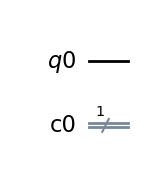

In [5]:
# To view the circuit
quantum_circuit.draw(output='mpl')

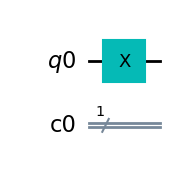

In [6]:
# Adding X Gate to the circuit
# The 0 indicates the 'q0' register
quantum_circuit.x(0)

# Draw the circuit again
quantum_circuit.draw(output='mpl')

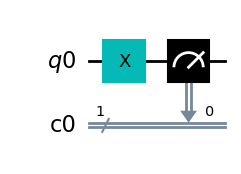

In [7]:
# Now we have to measure this to see how the gate works
# 0,0 defines quantum register 0 (q0) to classical register 0 (c0)
# If you use measure_all() you will no longer need the classical register.
quantum_circuit.measure(0,0)
quantum_circuit.draw(output='mpl')

In [8]:
pip freeze

anyio==4.2.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.14.0
beautifulsoup4==4.12.3
bleach==6.1.0
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
comm==0.2.1
contourpy==1.2.0
cryptography==42.0.2
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.8
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.48.1
fqdn==1.5.1
idna==3.6
ipykernel==6.29.2
ipython==8.21.0
ipywidgets==8.1.2
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.3
json5==0.9.14
jsonpointer==2.4
jsonschema==4.21.1
jsonschema-specifications==2023.12.1
jupyter-events==0.9.0
jupyter-lsp==2.2.2
jupyter_client==8.6.0
jupyter_core==5.7.1
jupyter_server==2.12.5
jupyter_server_terminals==0.5.2
jupyterlab==4.0.12
jupyterlab_pygments==0.3.0
jupyterlab_server==2.25.2
jupyterlab_widgets==3.0.10
kiwisolver==1.4.5
MarkupSafe==2.1.5
matplotlib==3.8.2
matplotlib-inline==0.1.6
mistune==3.0.2
mpmath==1.3.0
nbclient==0.9.0
nbconvert==7.1

In [9]:
# As we can see, the circuit now has a X Gate. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBM (IBM's quantum computer)
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
# You will get a huge result, but we only care about the 'counts'
print(result)

ModuleNotFoundError: No module named 'qiskit.providers.aer'

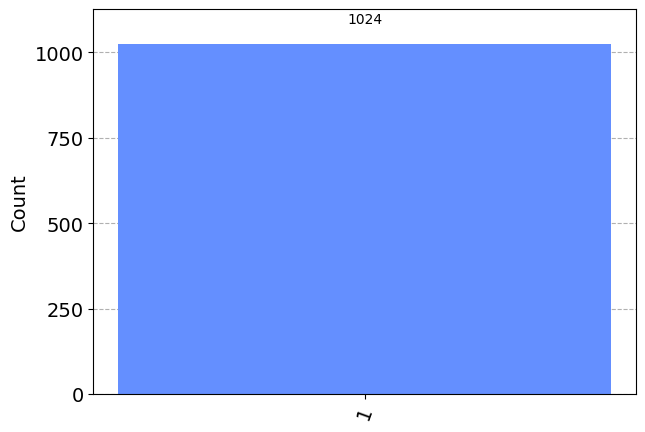

In [19]:
# We can plot a histogram to see the count values
from qiskit.visualization import plot_histogram
# This line of code below illustrates how to get counts from the output. 
#Note that you need to give the circuit name.
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)

In [1]:
# Let us see the counts
print(counts)

NameError: name 'counts' is not defined

In [21]:
# All the tries have turned out to be 1, so the X Gate worked. The input 0 is turned into 1.

<h2>Now let us see the working of this circuit on a real quantum machine. <br/>
Note: You need to create an IBMQ account before proceeding.</h2>

In [22]:
from qiskit import IBMQ,execute
# IBMQ.save_account('53aa1f4f9c13786efaba1153a4bbd7b8f26d318b09e99f09f37cf2ae0583c95e9cd7d780433ea88a591d6597e5f6fbc2c1255dc7342069a9fefe6a6beafd3bd8')
# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

In [23]:
# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders

print([backend.name() for backend in IBMQ.providers()[0].backends()])

/tmp/ipykernel_292621/2467840673.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_292621/2467840673.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


['ibmq_qasm_simulator', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibm_brisbane', 'ibm_kyoto', 'ibm_osaka']


<h3>You can select from:<br/>
ibmq_lima<br/>
ibmq_belem<br/>
ibmq_quito<br/>
ibmq_manila</h3>

In [24]:
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibm_brisbane')
job = execute(quantum_circuit, backend=backend, shots=1000 )
job_monitor(job)
results = job.result()

Job Status: job has successfully run


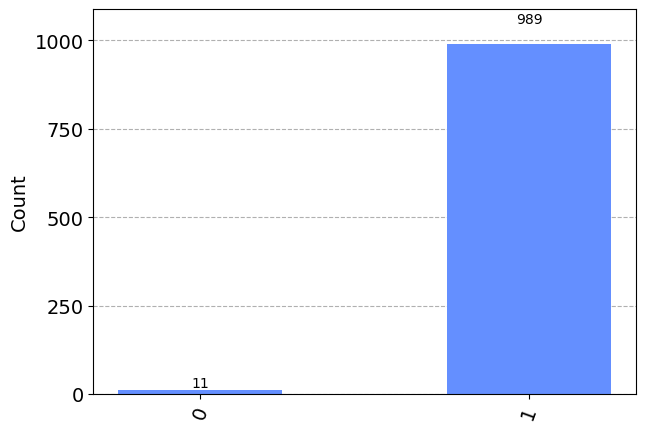

In [25]:
# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)